### **L4 기반(Google pro)**
- **불용어후보(7.2, 월)바탕으로 LDA**

### **한글깨짐 방지 아래 코드 돌리고 재시작**

In [1]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### **재시작**

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import time
import gzip
import pickle
import os

### **파일 읽기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
start_time = time.time()

# 현재 디렉토리를 확인합니다.
current_dir = '/content/drive/MyDrive/이대과제/data_gzip'

# 파일 리스트를 가져옵니다.
file_list = [f for f in os.listdir(current_dir) if f.endswith('.pkl.gz')]

# 빈 데이터프레임 리스트를 생성합니다.
df_list = []

# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.
for file in file_list:
    try:
        with gzip.open(os.path.join(current_dir, file), 'rb') as f:
            data = pickle.load(f)
            df = pd.DataFrame(data)
            if not df.empty:
                df_list.append(df)
            else:
                print(f"Empty DataFrame in file: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# 빈 리스트가 아닌지 확인합니다.
if df_list:
    # 모든 데이터프레임을 하나로 합칩니다.
    df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")
'''

'\nstart_time = time.time()\n\n# 현재 디렉토리를 확인합니다.\ncurrent_dir = \'/content/drive/MyDrive/이대과제/data_gzip\'\n\n# 파일 리스트를 가져옵니다.\nfile_list = [f for f in os.listdir(current_dir) if f.endswith(\'.pkl.gz\')]\n\n# 빈 데이터프레임 리스트를 생성합니다.\ndf_list = []\n\n# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.\nfor file in file_list:\n    try:\n        with gzip.open(os.path.join(current_dir, file), \'rb\') as f:\n            data = pickle.load(f)\n            df = pd.DataFrame(data)\n            if not df.empty:\n                df_list.append(df)\n            else:\n                print(f"Empty DataFrame in file: {file}")\n    except Exception as e:\n        print(f"Error reading file {file}: {e}")\n\n# 빈 리스트가 아닌지 확인합니다.\nif df_list:\n    # 모든 데이터프레임을 하나로 합칩니다.\n    df = pd.concat(df_list, ignore_index=True)\nelse:\n    print("No valid DataFrames to concatenate.")\n\nend_time = time.time()\nelapsed_time = end_time - start_time\nprint(f"Elapsed time: {elapsed_time:.2f} seconds")\n'

### **prompt: 일자와 언론사가 같은 행만 select**

In [ ]:
'''
print(df.shape)

df = df[~df.duplicated(['일자', '언론사', '제목'])]
print(df.shape)

# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)
'''

"\nprint(df.shape)\n\ndf = df[~df.duplicated(['일자', '언론사', '제목'])]\nprint(df.shape)\n\n# df['일자']를 날짜로 변경하고 index로 지정\ndf['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')\ndf['년도']=df['일자'].apply(lambda x: x.year)\ndf['월']=df['일자'].apply(lambda x: x.month)\n"

### **전체 파일 불러오기**

In [3]:
#df.to_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
# /content/drive/MyDrive/이대과제/data/df_sample_gzip.pkl
df= pd.read_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
print(df.shape)
df.head()

(5641608, 10)


,일자,언론사,제목,통합 분류1,통합 분류2,통합 분류3,기관,특성추출(가중치순 상위 50개),년도,월
0,2010-01-01,세계일보,2010 신년특집-업계 신년 구상/IT/SK 3조 투자 이종산업과 접목 주력,경제>산업_기업,IT_과학>모바일,IT_과학>인터넷_SNS,"FMC,IPE,KT,KTF,SK텔레콤,네이버,대상,정보통신","네트워크,3조,네이버,sk텔레콤,일본,사용자,kt,장악력,생산성,융합사업,이종산업,...",2010,1
1,2010-01-01,전자신문,[2010 신년특집] 해외 IT융합 프로젝트-일본 및 아시아국가,경제>자원,NaN,NaN,"민주당,일본,이화학연구소,문부과학성,건설공사,인도네시아,싱가포르,태양광발전소,그린I...","일본,싱가포르,슈퍼컴퓨터,전자폐기물,스마트그리드,대만,전력망,신재생,연구소,각국,차...",2010,1
2,2010-01-01,내일신문,소비양극화 백화점 인터넷쇼핑 성장,경제>산업_기업,경제>유통,경제>자동차,"후레쉬푸드,아울렛,타임스퀘어,슈퍼","백화점,편의점,온라인,대형마트,경쟁력,유통산업발전법,복합몰,유통업,신세계,쇼핑몰,신장세",2010,1
3,2010-01-01,이데일리,2010년 `보건의료분야` 이렇게 달라져요,사회>의료_건강,사회>장애인,NaN,"문화재단,시군구청,정부,사회복,식약청,사회복지,사회복지통합관리망,요양병원","장애인,진료비,의료기관,진단서,이데일리,소비자,건강보험,영유아,치료제,보건소,만4세...",2010,1
4,2010-01-01,이데일리,"이 대통령 ""상반기까진 출구전략 신중""",정치>청와대,정치>외교,NaN,"국무회의,정부,국무위","이데일리,상반기,일자리,선제적,공직자들,공직자,민간기업,해외진출,출구전략,재정지출,...",2010,1


In [4]:
# 필요한 컬럼만 추출
df= df[['일자', '특성추출(가중치순 상위 50개)']]

## **Sampling**

In [10]:
df= df.sample(frac=0.4)
# df= df.sample(frac=0.4, random_state=74)

### **불용어**

In [5]:
data = pd.read_excel('/content/drive/MyDrive/이대과제/data/불용어후보.xlsx')
print(data.shape)
data.tail()

# 불용어 처리
stop_words = data[data['불용어_0705'] == 1]['단어'].tolist()

(4921, 11)


,단어,불룡어?,유형,이대,불용어_0622,불용어_0625,불용어_0627,불용어_0702,불용어_0703,불용어_0704,불용어_0705
4916,불필요,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4917,당국자,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4918,국가,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4919,원주,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4920,신청자,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
'''
# corpus 정제
import re

def preprocess_corpus(corpus):
    updated_corpus = []
    pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])')
    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')

    for document in corpus:
        if isinstance(document, str):
            words = document.split(',')
            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]
            updated_corpus.append(','.join(filtered_words))
        else:
            updated_corpus.append('')
    return updated_corpus
'''

"\n# corpus 정제\nimport re\n\ndef preprocess_corpus(corpus):\n    updated_corpus = []\n    pattern_mixed = re.compile(r'(?=.*\\d)(?=.*[a-zA-Z가-힣])')\n    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')\n\n    for document in corpus:\n        if isinstance(document, str):\n            words = document.split(',')\n            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]\n            updated_corpus.append(','.join(filtered_words))\n        else:\n            updated_corpus.append('')\n    return updated_corpus\n"

## **corpus**

In [ ]:
'''
corpus = []
#for keywords in df['특성추출(가중치순 상위 50개)']:
for keywords in df['특성추출(가중치순 상위 50개)']:
    corpus.append(keywords)
corpus[:2]

# 각 년도별 corpus 정제
cleaned_corpus = preprocess_corpus(corpus)
cleaned_corpus[:2]

corpus = cleaned_corpus
'''

"\ncorpus = []\n#for keywords in df['특성추출(가중치순 상위 50개)']:\nfor keywords in df['특성추출(가중치순 상위 50개)']:\n    corpus.append(keywords)\ncorpus[:2]\n\n# 각 년도별 corpus 정제\ncleaned_corpus = preprocess_corpus(corpus)\ncleaned_corpus[:2]\n\ncorpus = cleaned_corpus\n"

### **CountVectorizer, TfidfVectorizer,TfidfTransformer**

In [ ]:
'''
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
vect = CountVectorizer(stop_words = stop_words,
                       ngram_range=(1, 1),
                       min_df= 0.0025,
                       max_df= 0.9)

X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
len(vect.get_feature_names_out())
X

from scipy import sparse
X.toarray()
sparse.csr_matrix(X.toarray())
'''

'\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer\nvect = CountVectorizer(stop_words = stop_words,\n                       ngram_range=(1, 1),\n                       min_df= 0.0025,\n                       max_df= 0.9)\n\nX = vect.fit_transform(corpus) # Doc-Term Matrix 계산\nlen(vect.get_feature_names_out())\nX\n\nfrom scipy import sparse\nX.toarray()\nsparse.csr_matrix(X.toarray())\n'

In [ ]:
#pd.DataFrame(X.toarray(), columns = vect.get_feature_names_out())

## 1. 사이킷런을 이용한 토픽 모델링
- **[파이썬 텍스트 마이닝 완벽 가이드](https://github.com/wikibook/textmining/blob/main/Ch%2007.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb)**
### **LDA**

In [ ]:
'''
from sklearn.decomposition import LatentDirichletAllocation
# 5개의 주제만 뽑았으니 n_components(토픽개수) 5로 설정
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# components_속성은 5개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)
'''

'\nfrom sklearn.decomposition import LatentDirichletAllocation\n# 5개의 주제만 뽑았으니 n_components(토픽개수) 5로 설정\nlda = LatentDirichletAllocation(n_components=5, random_state=42)\nlda.fit(X)\n# components_속성은 5개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌\nprint(lda.components_.shape)\nprint(lda.components_)\n'

## **<font color='blue'> gensim을 이용하여 LDA**

- 하이퍼파라미터 3개 부터 10개 LDA수행 후 토픽 개수 결정
- topic : 당신이 가설로 잡은 토픽의 갯수는?
- chunksize : 얼마나 많은 문서가 훈련 알고리즘에 사용되는가?
- 만약에 빠른 학습이 중요하시다면, 청크사이즈를 키워서 돌려봅시다!
- Hoffman의 논문에 의하면 Chunksize는 모델 품질에 영향을 미치지만 차이그 그렇게 크진 않다고 합니다!
- passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다. epochs 와 같은 용어 같다! model를 학습시키는 횟수를 말하는것 같아요! model sampling?
- iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.
pass & iteration 은 최대한 많은게 좋다!
- eval_every = 1 in LdaModel
- alpha, eta = auto, 디리클레 분포의 감마함수에 대한 파라미터입니다!

In [6]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess # lemmatize is no longer in gensim.utils
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer

### **정규표현식으로 필요한 단어만 추출하거나, 불필요한 단어를 삭제**

In [7]:
RegTok = RegexpTokenizer("[\w']{2,}") # 정규포현식으로 토크나이저를 정의
food_stops = set(stop_words) # 불용어를 가져옴

# Compile the additional regular expressions
pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])') # 숫자와 알파벳 또는 한글이 모두 포함된 문자열을 찾는 정규 표현식
pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')  # 한글과 알파벳으로만 구성된 문자열을 찾는 정규 표현식

# Define the pattern to remove words containing both numbers and either English or Korean characters
pattern_remove = re.compile(r'\d+[a-zA-Z가-힣]+|[a-zA-Z가-힣]+\d+')  # 90ml', '1항', '3qo', '30개국' 등과 같이 수자와 영문, 수자와 한글이 나오는 단어를 제거

def tokenizer(text):
    tokens = RegTok.tokenize(text)
    # Filter out stop words and apply the additional patterns
    words = [word for word in tokens if (word not in food_stops) and
             (len(word) >= 2) and
             not pattern_remove.match(word) and
             (pattern_mixed.match(word) or pattern_korean_english.match(word))]
    return words

In [11]:
# Check the data types in your DataFrame
print(df['특성추출(가중치순 상위 50개)'].dtypes)

# If the column is not of type string, convert it:
df['특성추출(가중치순 상위 50개)'] = df['특성추출(가중치순 상위 50개)'].astype(str)

texts = [tokenizer(news) for news in df['특성추출(가중치순 상위 50개)']]

object


### **기본 현황**

In [12]:
from tqdm import tqdm
# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in tqdm(texts)]

# Create Corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in data_words if text not in stop_words]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 1869005
#Number of unique words after removing rare and common words: 2000


100%|██████████| 2256643/2256643 [00:20<00:00, 110521.19it/s]

#Number of unique tokens: 2000
#Number of documents: 2256643


### **Topic수에 따라 Clustering하고 시각화**

In [13]:
%%capture
!pip install pyLDAvis

### **혼란도와 토픽 응집도를 이용한 최적값 선택**
- https://github.com/wikibook/textmining/blob/main/Ch%2007.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb

num_topics: 3, perplexity: -6.782, coherence: -3.675
num_topics: 4, perplexity: -6.834, coherence: -3.930
num_topics: 5, perplexity: -6.909, coherence: -3.885
num_topics: 6, perplexity: -7.010, coherence: -4.187
num_topics: 7, perplexity: -7.094, coherence: -4.275
num_topics: 8, perplexity: -7.101, coherence: -4.638
num_topics: 9, perplexity: -7.151, coherence: -4.593
num_topics: 10, perplexity: -7.179, coherence: -4.804


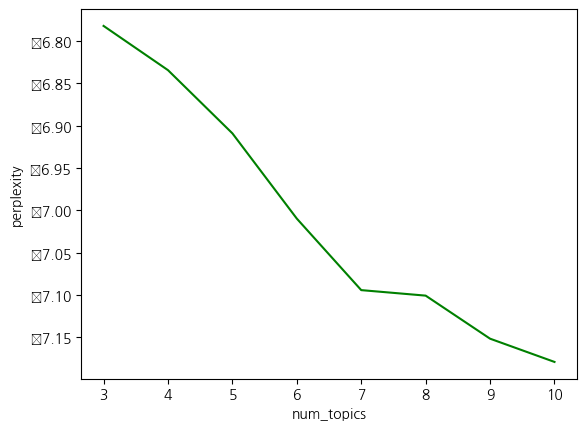

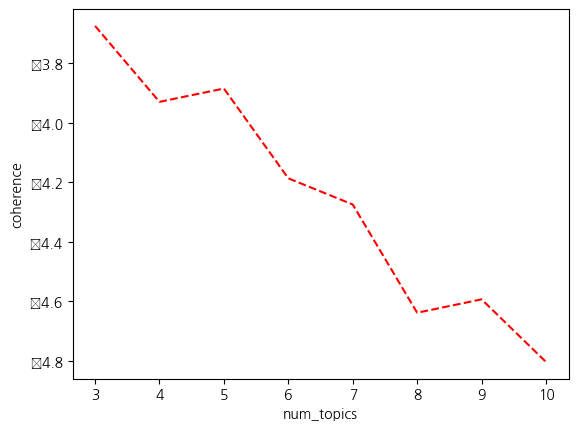

In [ ]:
'''
from gensim.models import CoherenceModel
from gensim.models import LdaModel # Import LdaModel

def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus,
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=3, end=10)
'''

In [14]:
from gensim.models import LdaModel
import pyLDAvis.gensim # Now this import should work , !pip install pyLDAvis
from tqdm import tqdm
from datetime import date

num_topics = [7]
for num_topics in  tqdm(num_topics):
    passes = 5
    %time model = LdaModel(corpus=corpus, id2word=dictionary,\
                           passes=passes, num_topics=num_topics, \
                           random_state=7)

    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)

    pyLDAvis.save_html(vis, str(num_topics) + '_topics_' + str(date.today()) + '---' + '.html')

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 14min 20s, sys: 4.1 s, total: 14min 24s
Wall time: 14min 21s


100%|██████████| 1/1 [16:17<00:00, 977.73s/it]


## **Topic의 개수를 정하고 model을 결정**

## **Topic에 따라 아래 분석**

In [ ]:
'''
model = LdaModel(corpus=corpus, id2word=dictionary,\
                           passes=passes, num_topics=_topic_, \
                           random_state=7)
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
for topic in model.print_topics():
    print(topic)

with open(f'{str(num_topics)}_topics.txt', 'w', encoding='utf-8') as file:
        for topic in model.print_topics():
            file.write(str(topic) + '\n')

(0, '0.022*"지역사회" + 0.020*"보건소" + 0.017*"식습관" + 0.016*"식생활" + 0.015*"취약계층" + 0.014*"유관기관" + 0.014*"건강관리" + 0.012*"맞춤형" + 0.010*"단백질" + 0.008*"면역력"')
(1, '0.065*"학생들" + 0.048*"학부모" + 0.025*"교육부" + 0.024*"교육청" + 0.019*"고등학교" + 0.019*"학생" + 0.017*"유치원" + 0.017*"어린이집" + 0.016*"교육" + 0.014*"청소년들"')
(2, '0.047*"지자체" + 0.038*"공무원" + 0.030*"간담회" + 0.026*"농산물" + 0.025*"소상공인" + 0.022*"안전관리" + 0.017*"안전사고" + 0.016*"코로나바이러스" + 0.012*"코로나" + 0.011*"환경부"')
(3, '0.059*"소비자" + 0.052*"편의점" + 0.042*"우리나라" + 0.039*"온라인" + 0.021*"소비자들" + 0.019*"유튜브" + 0.014*"sns" + 0.013*"페이스북" + 0.011*"스마트폰" + 0.008*"판매량"')
(4, '0.066*"캠페인" + 0.029*"지역" + 0.026*"안전" + 0.021*"사업" + 0.020*"예방" + 0.020*"활동" + 0.017*"교육" + 0.016*"대상" + 0.014*"행사" + 0.013*"홍보"')
(5, '0.065*"온라인" + 0.053*"빅데이터" + 0.043*"ai" + 0.033*"인공지능" + 0.025*"스마트폰" + 0.022*"편의점" + 0.021*"소비자" + 0.016*"코로나" + 0.016*"오프라인" + 0.014*"쇼핑몰"')
(6, '0.139*"전문가" + 0.021*"온라인" + 0.019*"지자체" + 0.017*"빅데이터" + 0.016*"우리나라" + 0.014*"식약처" + 0.012*"안전성" + 0.011*"안전망" + 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


149

146

152

149

136

148

149

### **LDA 년도별 문서 분포 결과 출력**

### **1. 문서집단(corpus)을 바탕으로 온라인 기사별로 토픽별 비중을 확인**


In [16]:
doc_topics =[]
for topic_list in tqdm(model[corpus]):
    ulist =[]
    for j in range(len(topic_list)):
        ulist.append(topic_list[j][1]) # topic 이 5개인 경우
    doc_topics.append(ulist)

pd.DataFrame(doc_topics).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 2256643/2256643 [04:01<00:00, 9351.08it/s]


,0,1,2,3,4,5,6
0,0.071429,0.071429,0.071429,0.071429,0.071429,0.571427,0.071429
1,0.071434,0.071434,0.071434,0.071434,0.571395,0.071434,0.071434
2,0.228538,0.028578,0.428569,0.028614,0.028578,0.028578,0.228546


In [ ]:
# pd.DataFrame(doc_topics).sum(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2256638    1.0
2256639    1.0
2256640    1.0
2256641    1.0
2256642    1.0
Length: 2256643, dtype: float64

### **2. 문서집단(corpus)을 바탕으로 년도별로 온라인 기사의 토픽별 비중을 확인**
#### **Assuming topics; topic_num = ?**

In [22]:
topic_list = np.argmax(pd.DataFrame(doc_topics).values, axis=1).tolist()

# Sample data (for demonstration purposes, replace with your actual data)
tf = pd.DataFrame({
    '일자': pd.date_range(start='2010-01-01', end='2024-12-31', freq='M'),
    '문서': np.random.randint(0, 100, size=(180,))
})

# Ensure topic_list has the same length as tf########################
# Assuming topics####################################################
#####################################################################
doc_topics = np.random.rand(len(tf), num_topics)
topic_list = np.argmax(doc_topics, axis=1).tolist()

# LDA 년도별 문서 분포 결과 출력
start_year = 2010
end_year = 2024
result_df = pd.DataFrame()  # Initialize result_df before the loop
######################
######################
# 데이터프레임을 3개년도씩 분리
year_ranges = [(2010, 2012), (2013, 2015), (2016, 2018), (2019, 2021), (2022, 2024)]

# 디렉토리 생성
output_dir = '/content/drive/MyDrive/이대과제/0705'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for start_year, end_year in tqdm(year_ranges):

    start_date = str(start_year) + "-01-01"
    end_date = str(end_year) + "-12-31"
    dt_idx = (tf['일자'] >= start_date) & (tf['일자'] <= end_date)
    sub_tf = tf[dt_idx]

    # Ensure indices are within bounds
    valid_indices = [i for i in dt_idx.index[dt_idx] if i < len(topic_list)]
    sub_topic_list = [topic_list[i] for i in valid_indices]

    result = []
    for t in range(max(topic_list) + 1):
        # Count occurrences of each topic in sub_topic_list
        num = sub_topic_list.count(t)
        result.append(num)
    result = pd.Series(result, name=str(end_year))
    result_df = pd.concat([result_df, result], axis=1)

# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(), axis=1)
result_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 5/5 [00:00<00:00, 598.90it/s]


,0,1,2,3,4,5,6
2012,0.138889,0.166667,0.111111,0.166667,0.111111,0.138889,0.166667
2015,0.222222,0.277778,0.083333,0.083333,0.166667,0.055556,0.111111
2018,0.027778,0.138889,0.166667,0.138889,0.166667,0.194444,0.166667
2021,0.027778,0.055556,0.222222,0.222222,0.222222,0.111111,0.138889
2024,0.138889,0.138889,0.111111,0.111111,0.111111,0.250000,0.138889


### **3. 문서집단(corpus)을 바탕으로 온라인 기사별로 토픽별 비중 시각화**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.06944444444444445, 0.0, '13.9')

Text(0.1111111111111111, 1.0, '22.2')

Text(0.013888888888888888, 2.0, '2.8')

Text(0.013888888888888888, 3.0, '2.8')

Text(0.06944444444444445, 4.0, '13.9')

Text(0.22222222222222224, 0.0, '16.7')

Text(0.3611111111111111, 1.0, '27.8')

Text(0.09722222222222222, 2.0, '13.9')

Text(0.05555555555555555, 3.0, '5.6')

Text(0.20833333333333334, 4.0, '13.9')

Text(0.36111111111111116, 0.0, '11.1')

Text(0.5416666666666666, 1.0, '8.3')

Text(0.25, 2.0, '16.7')

Text(0.19444444444444442, 3.0, '22.2')

Text(0.33333333333333337, 4.0, '11.1')

Text(0.5, 0.0, '16.7')

Text(0.625, 1.0, '8.3')

Text(0.4027777777777778, 2.0, '13.9')

Text(0.41666666666666663, 3.0, '22.2')

Text(0.4444444444444444, 4.0, '11.1')

Text(0.6388888888888888, 0.0, '11.1')

Text(0.75, 1.0, '16.7')

Text(0.5555555555555556, 2.0, '16.7')

Text(0.6388888888888888, 3.0, '22.2')

Text(0.5555555555555556, 4.0, '11.1')

Text(0.7638888888888888, 0.0, '13.9')

Text(0.8611111111111112, 1.0, '5.6')

Text(0.7361111111111112, 2.0, '19.4')

Text(0.8055555555555555, 3.0, '11.1')

Text(0.7361111111111112, 4.0, '25.0')

Text(0.9166666666666665, 0.0, '16.7')

Text(0.9444444444444444, 1.0, '11.1')

Text(0.9166666666666667, 2.0, '16.7')

Text(0.9305555555555554, 3.0, '13.9')

Text(0.9305555555555556, 4.0, '13.9')

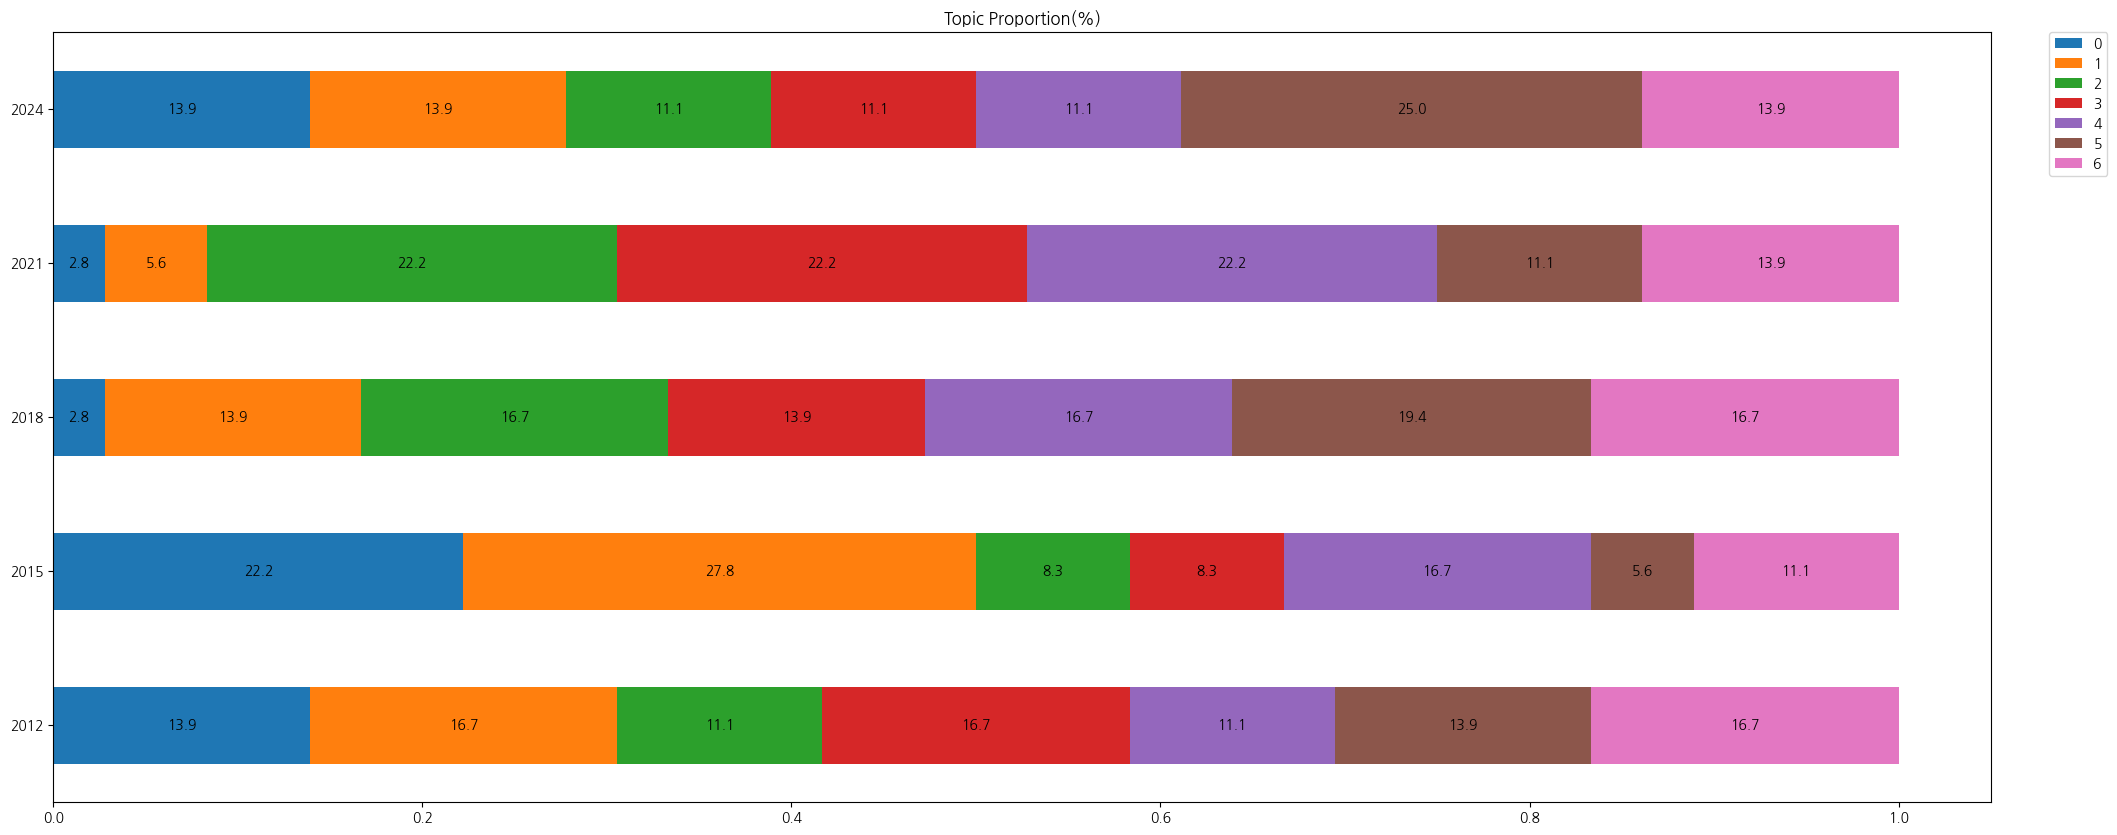

In [24]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(25, 10), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

# Save the figure as a PNG file
ax.figure.savefig(f'{num_topics}_topics_비중.png')

### **4. 문서집단(corpus)을 바탕으로 각 토픽의 년도별 비중의 추세 확인**

In [25]:
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]

doc_topics =[]
for topic_list in model[corpus]:
    ulist =[]
    for j in range(len(topic_list)):
        ulist.append(topic_list[j][1])
    doc_topics.append(ulist)

pd.DataFrame(doc_topics).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,0.071429,0.071429,0.071429,0.071429,0.071429,0.571427,0.071429
1,0.071434,0.071434,0.071434,0.071434,0.571395,0.071434,0.071434
2,0.228538,0.028578,0.428569,0.028613,0.028578,0.028578,0.228546


In [32]:
trend_data = pd.DataFrame(doc_topics)
print(len(trend_data))
trend_data['start'] = df['일자'].values
trend_data = trend_data.set_index('start')
trend_data = trend_data.resample('3Y').mean()

# trend_data = trend_data.resample('M').mean()
trend_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2256643


,0,1,2,3,4,5,6
start,,,,,,,
2010-12-31,0.126679,0.140622,0.148525,0.172776,0.157508,0.137043,0.121379
2013-12-31,0.124298,0.134981,0.143657,0.173560,0.157190,0.140098,0.130970
2016-12-31,0.122618,0.128918,0.150079,0.170045,0.144314,0.148103,0.140379
2019-12-31,0.125394,0.130391,0.154239,0.164775,0.139358,0.157194,0.132804
2022-12-31,0.118680,0.130339,0.171467,0.159811,0.119225,0.171303,0.131880
2025-12-31,0.123853,0.143483,0.163822,0.155753,0.123616,0.158790,0.133428


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Topic 0: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 1: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 2: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 3: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 4: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 5: 3개년 계획별 추세선')

Text(0.5, 1.0, 'Topic 6: 3개년 계획별 추세선')

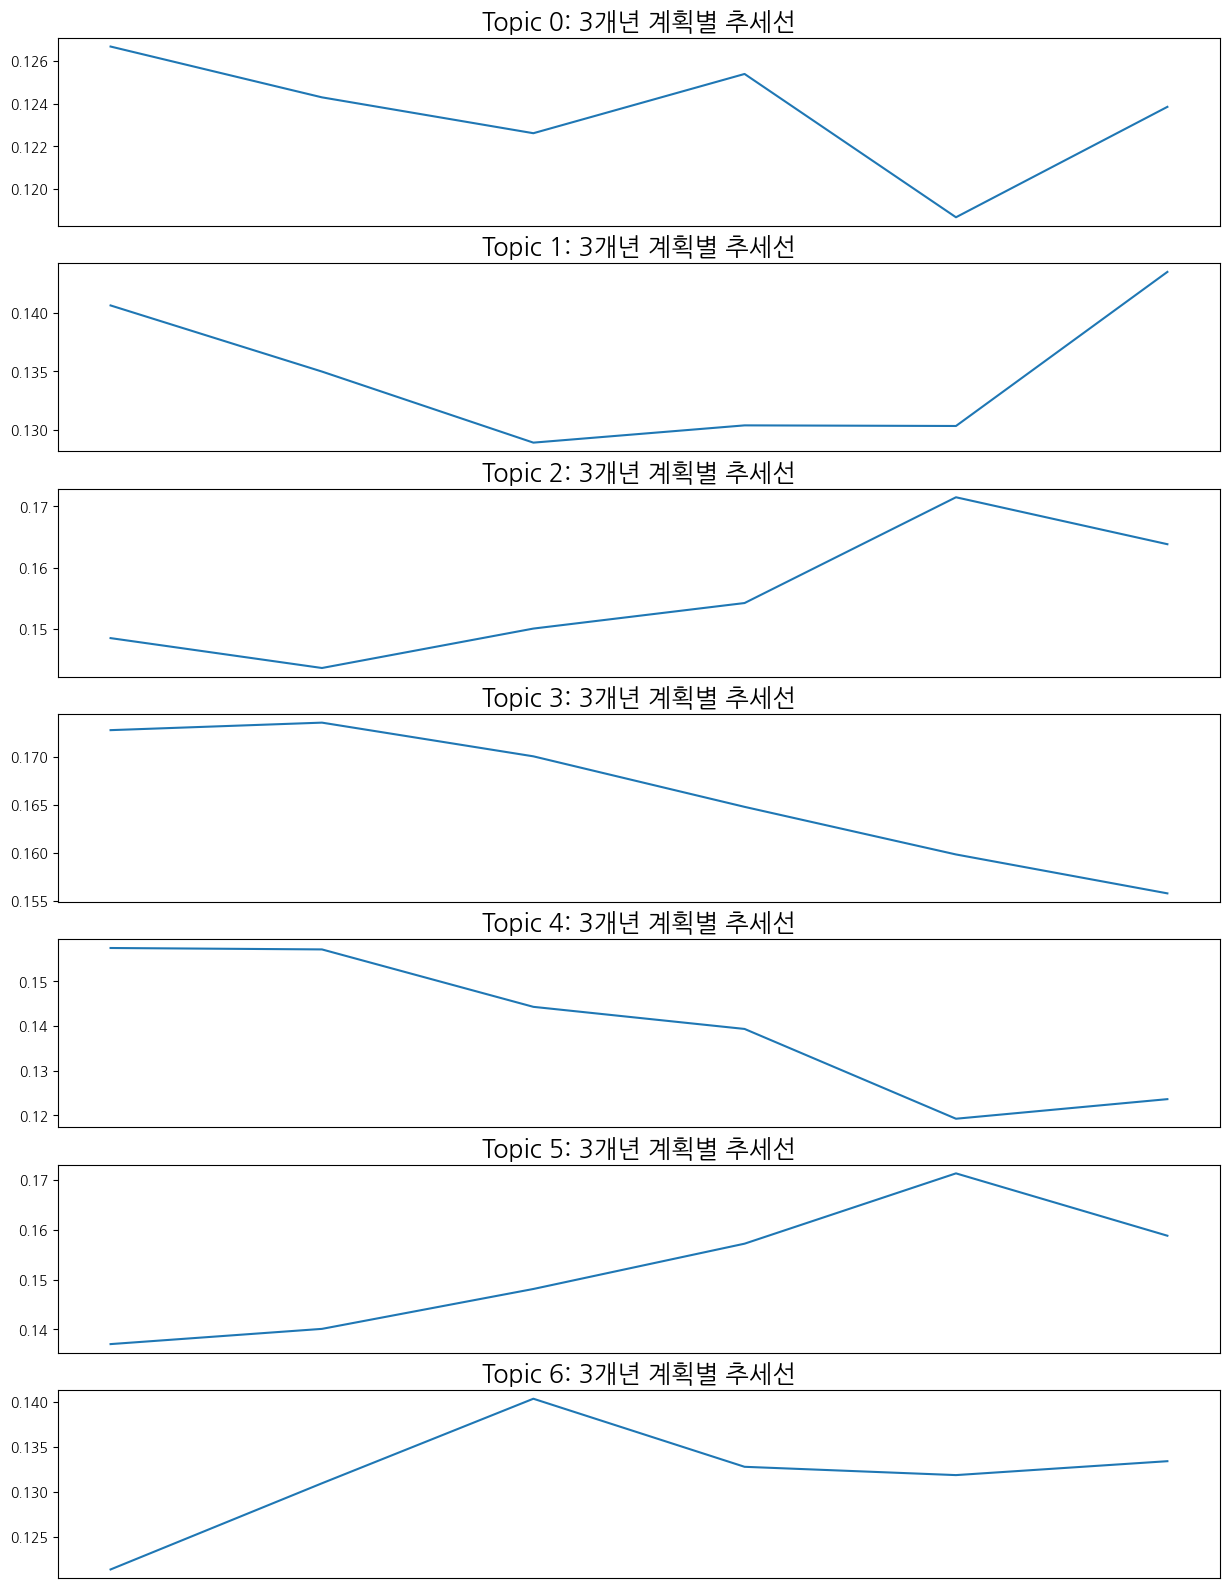

In [41]:
fig, axes = plt.subplots(num_topics, 1, sharex='col', figsize=(15, 20))

for col, ax in zip(trend_data.columns.tolist(), axes.ravel()):
    ax.set_title(f'Topic {col}: 3개년 계획별 추세선', fontsize=18)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend_data[col])
ax.figure.savefig(f'{num_topics}_topic_비중추세.png')

## **END**